In [1]:
import pandas as pd
from plotnine import *
import numpy as np
import multiprocessing
from adjustText import adjust_text

## Fig 6: t-SNE embedding with archaelogical samples

In [2]:
s = "../../data/sourcepredict/sourcepredict_embedding.csv"
s_pred = "../../data/sourcepredict/prediction.sourcepredict.csv"

In [3]:
sp = pd.read_csv(s, index_col=0)

In [4]:
spp = pd.read_csv(s_pred, index_col=0).T

In [5]:
conditions = [(spp['Canis_familiaris'] > 0.5) ,
              (spp['Homo_sapiens'] > 0.5),
              (spp['Soil'] > 0.5),
              (spp['unknown'] > 0.5)
             ]
choices = ['Canis familiaris', 'Homo sapiens', 'Soil', 'Unknown']
spp['Predicted organism'] = np.select(conditions, choices, default='Unknown')

In [6]:
sp['organism'] = sp.drop(spp.index, axis=0)['labels'].append(spp['Predicted organism'])

In [7]:
sp['ml'] = np.where(sp['labels'] == 'sink', 'predicted', 'reference')

In [8]:
sp['organism'].value_counts()

Homo_sapiens        262
Canis_familiaris    150
Soil                 25
Homo sapiens          8
Unknown               5
Canis familiaris      2
Name: organism, dtype: int64

In [9]:
sp['organism'] = sp['organism'].str.replace('_'," ")

In [10]:
sp.sample(10)

,PC1,PC2,labels,name,organism,ml
SRR7658589,-18.268778,7.274716,Homo_sapiens,SRR7658589,Homo sapiens,reference
ERR1915590,35.276405,9.526642,Canis_familiaris,ERR1915590,Canis familiaris,reference
SRR1175013,1.377565,24.684189,Homo_sapiens,SRR1175013,Homo sapiens,reference
ERR1914985,19.108710,-1.269424,Canis_familiaris,ERR1914985,Canis familiaris,reference
ERR1915335,13.561503,10.098280,Canis_familiaris,ERR1915335,Canis familiaris,reference
SRR1761711,-20.634990,2.874133,Homo_sapiens,SRR1761711,Homo sapiens,reference
ERR1914997,19.106440,-1.269250,Canis_familiaris,ERR1914997,Canis familiaris,reference
ERR1914674,18.892061,9.938174,Canis_familiaris,ERR1914674,Canis familiaris,reference
SRR7658627,-1.357085,-18.687866,Homo_sapiens,SRR7658627,Homo sapiens,reference
SRR7658597,-19.196331,-1.257208,Homo_sapiens,SRR7658597,Homo sapiens,reference


In [11]:
sp_ref = sp.query('ml == "reference"')
sp_pred = sp.query('ml == "predicted"')

In [12]:
sample_type = pd.DataFrame({
    'AHP003':['Coprolite', '11' ],
    'CMN001':['Archaelogical sediment','20'],
    'ZSM005':['Coprolite','02'],
    'ZSM002':['Coprolite','01'],
    'ZSM029':['Coprolite','07'],
    'YRK001':['Coprolite','13'],
    'ZSM025':['Coprolite','04'],
    'ZSM028':['Coprolite','06'],
    'ZSM031':['Coprolite','08'],
    'ZSM023':['Coprolite','03'],
    'ECO004':['Archaelogical sediment','19'],
    'AHP001':['Coprolite','09'],
    'AHP002':['Coprolite','10'],
    'CBA001':['Archaelogical sediment','16'],
    'LEI010':['Archaelogical sediment','18'],
    'AHP004':['Coprolite','12'],
    'DRL001':['Archaelogical sediment','15'],
    'ZSM027':['Coprolite','05'],
    'BRF001':['Archaelogical sediment','17'],
    'MLP001':['Archaelogical sediment','21'],
}, index = ['sample_type','plot_id'])

In [13]:
sp_pred = sp_pred.merge(sample_type.T, left_index=True, right_index=True)

In [14]:
sp_pred['plot_id'].sort_values()

ZSM002    01
ZSM005    02
ZSM023    03
ZSM025    04
ZSM027    05
ZSM028    06
ZSM029    07
ZSM031    08
AHP001    09
AHP002    10
AHP003    11
AHP004    12
YRK001    13
DRL001    15
CBA001    16
BRF001    17
LEI010    18
ECO004    19
CMN001    20
MLP001    21
Name: plot_id, dtype: object

In [15]:
sp_pred['organism'].value_counts()

Homo sapiens        8
Unknown             5
Soil                5
Canis familiaris    2
Name: organism, dtype: int64

In [16]:
sp_pred.query("organism == 'Canis familiaris'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
AHP004,7.463623,-7.275122,sink,AHP004,Canis familiaris,predicted,Coprolite,12
YRK001,12.980815,1.274512,sink,YRK001,Canis familiaris,predicted,Coprolite,13


In [17]:
sp_pred.query("organism == 'Soil' and sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [18]:
sp_pred.query("sample_type == 'Archaelogical sediment'")

,PC1,PC2,labels,name,organism,ml,sample_type,plot_id
BRF001,-12.659374,-35.260160,sink,BRF001,Soil,predicted,Archaelogical sediment,17
DRL001,-6.732208,-35.138317,sink,DRL001,Unknown,predicted,Archaelogical sediment,15
LEI010,-6.298735,-30.463503,sink,LEI010,Soil,predicted,Archaelogical sediment,18
ECO004,-9.556790,-34.750652,sink,ECO004,Unknown,predicted,Archaelogical sediment,19
MLP001,-6.291108,-30.472930,sink,MLP001,Unknown,predicted,Archaelogical sediment,21
CMN001,-8.172891,-35.017400,sink,CMN001,Unknown,predicted,Archaelogical sediment,20
CBA001,-8.971134,-35.102470,sink,CBA001,Soil,predicted,Archaelogical sediment,16


In [19]:
sp_pred.sort_values("plot_id").merge(spp, left_index=True, right_index=True)[['PC1','PC2','Canis_familiaris','Homo_sapiens','Soil','unknown','Predicted organism','plot_id']].to_csv('sourcepredict_results.csv')

In [20]:
adj_text = sp_pred.query("plot_id == ['01','03']")

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: results/figure6.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


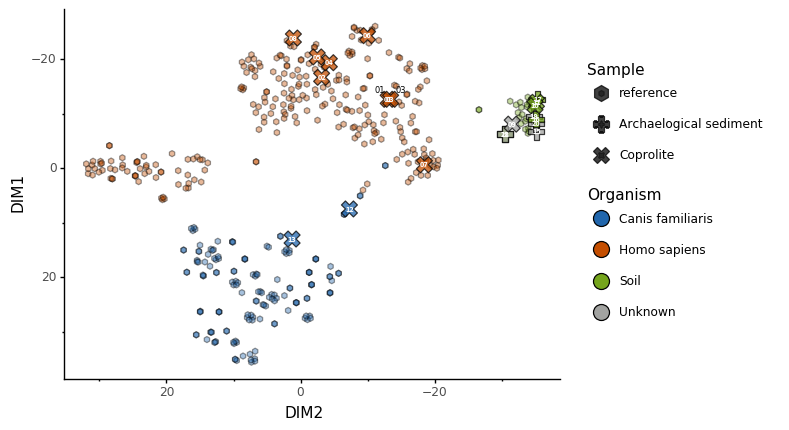

<ggplot: (8776326185003)>

In [21]:
p = ggplot(sp_ref, aes(x='PC1',y='PC2')) + geom_point(aes(fill='organism', shape='ml'), stroke=0.5, color='black', size = 2, alpha=0.4)
p = p + geom_point(data = sp_pred, mapping=aes(x='PC1',y='PC2', fill='organism', shape='sample_type'), stroke=0.5, color='black', size = 6, alpha=0.75)
p = p + geom_text(data = adj_text, mapping= aes(x='PC1', y='PC2', label = 'plot_id'), size=6, adjust_text= {
    'expand_points': (2, 2),
    'expand_objects': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'grey'
    },
    'on_basemap':True
})
p = p + geom_text(data = sp_pred, mapping=aes(x='PC1',y='PC2', label='plot_id'), size = 4.5,fontweight = 'bold', color='white')
p = p + scale_shape_manual(name='Sample', values={'Coprolite':'X', 'Archaelogical sediment':'P', 'reference':'h'}) + theme_classic() + labs(x='DIM1',y='DIM2')
p = p + scale_fill_manual(name = 'Organism', values = {"Canis familiaris":"#2166ac","Homo sapiens":"#c44e00", "Soil":"#75a51c", 'Unknown':'#a2a3a1'})
p = p + guides(fill = guide_legend(override_aes = {'alpha':1}))
p = p + coord_flip() + scale_y_reverse() + scale_x_reverse()
p.save("results/figure6.png", dpi=300)
p